In [1]:
#Importing Stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
#Reading the data
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
y=train['label']
train.drop('label',axis=1,inplace=True)
training_images=train.to_numpy()
test_images=test.to_numpy()

In [3]:
#Rescaling our image sizes and turning target column into a vector
training_images = training_images/255.0
test_images = test_images/255.0
training_images = training_images.reshape(42000, 28, 28, 1)
test_images = test_images.reshape(28000, 28, 28, 1)
y=y.to_numpy()
y= OneHotEncoder(sparse=False).fit_transform(y.reshape(-1,1))
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [5]:
#Creating a model using the sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5),padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (5, 5),padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3),padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation='softmax')
    ])

In [6]:
model.summary() #Summarising out model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
#Compiling and training our model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.1,
      fill_mode='nearest')

train_generator=train_datagen.flow(training_images,y,batch_size=100)

model.fit_generator(train_generator,epochs = 40,callbacks = [learning_rate_reduction])

In [ ]:
model.save('model1') #Saving the model incase we need it later

In [7]:
reload_model = keras.models.load_model("model1") #Reloading the model we saved just now

In [8]:
result=reload_model.predict(test_images) #Predciting the results

In [9]:
result = np.argmax(result,axis = 1)  #Converting the result vector to label array
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

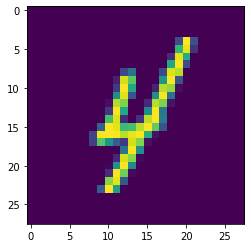

In [14]:
plt.imshow(test_images[3221].reshape(28,28)) #View an image

In [15]:
result[3221] # See how the model predicted the above image

4

In [17]:
res=pd.read_csv('data/sample_submission.csv',index_col=None) 
res['Label']=result
res.to_csv('Submission.csv',index=False)  #This model1 has an accuracy of 99.467 on the test set